A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [27]:
#importamos librerias

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(train_images, train_labels), (test_images, test_labels)= keras.datasets.mnist.load_data()

In [29]:
train_images.shape  #exploramos el dataset

(60000, 28, 28)

In [30]:
train_images[0].shape   #es la resolucion de la imagen 28x28x1

(28, 28)

In [31]:
len(train_labels) #comprobamos el nro de etiquetas en el set de entrenamiento

60000

#### pre-procesamos los datos 

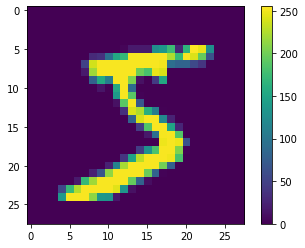

In [32]:
#valores de los pixeles estan entre 0 y 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
test_images.shape  #hay 10 000 imagenes en el set de prueba

(10000, 28, 28)

In [36]:
train_images, test_images = train_images / 255.0, test_images / 255.0

* Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set

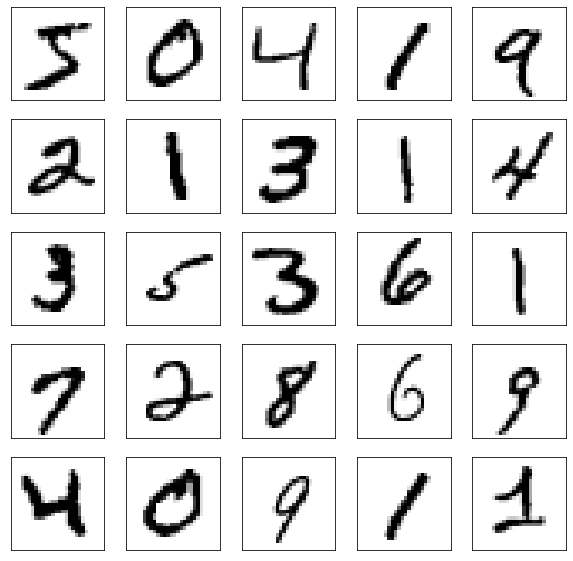

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
   
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

## 1

* Nos piden: 


+   1 capa convolutiva con 8 neuronas
+   1 MaxPool quedando las dimensiones de la imagen a la mitad
+   1 dropout 0.25
+   1 Flatten
+   1 dense con 32 neuronas
+   1 dense con 10 (salida)

In [41]:
# necesito redimensionar las imagenes a una dimensión antes de pasárselo a la red.
train_images_2 = train_images.reshape(60000,28,28,1)
train_images_2.shape

(60000, 28, 28, 1)

In [42]:
# Manteniendo la resolución original (padding=same)
model = models.Sequential()
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(28, 28,1),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32 , activation='softmax'))
model.add(layers.Dense(10 , activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
__________________________________________________

### Compilo el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entreno el Modelo

In [44]:
model.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2375 - accuracy: 0.7558
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6490 - accuracy: 0.7896
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4333 - accuracy: 0.8873
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3066 - accuracy: 0.9290
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2459 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2021 - accuracy: 0.9524
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1719 - accuracy: 0.9566
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1468 - accuracy: 0.9610
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1316 - accuracy: 0.9649
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.121

### Evaluo exactitud

In [45]:
# redimensiono mi conjunto de test
test_images_2 = test_images.reshape(10000,28,28,1)
test_images_2.shape

(10000, 28, 28, 1)

In [46]:
test_loss, test_acc = model.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1004 - accuracy: 0.9728

Test accuracy: 0.9728000164031982


### * La distancia entre el conjunto de test y el de entrenamiento no es mucho, apenas un 0.54%, por lo que no parece que haya habido sobreentrenamiento; podemos decir que nuestra red esta acertando con bastante fiabilidad, el Dropout ha evitado el overfiting.

---

## 2
 2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [47]:
train_images_3 = train_images.reshape(60000,28,28,1)
train_images_3.shape

(60000, 28, 28, 1)

In [48]:
test_images_3 = test_images.reshape(10000,28,28,1)
test_images_3.shape

(10000, 28, 28, 1)

In [49]:
# Manteniendo la resolución original (padding=same)
model = models.Sequential()
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(28, 28,1),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16 , activation='softmax'))
model.add(layers.Dense(32 , activation='softmax'))
model.add(layers.Dense(10 , activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                25104     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [50]:
# compilo:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# realizo el entrenamiento 

model.fit(train_images_3, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6532 - accuracy: 0.5941
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8320 - accuracy: 0.6704
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6753 - accuracy: 0.6964
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5716 - accuracy: 0.7688
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4253 - accuracy: 0.8389
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3431 - accuracy: 0.8637
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2963 - accuracy: 0.8787
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2702 - accuracy: 0.8974
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2451 - accuracy: 0.9229
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.187

In [52]:
#evaluo exactitud

test_loss, test_acc = model.evaluate(test_images_3,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1440 - accuracy: 0.9644

Test accuracy: 0.9643999934196472


* con los nuevos parámetros, el conjunto de entrenamiento se distancia del de test en 1,20%, con el dropout de un 25% se ha evitado nuevamente el sobreentrenamiento aunque el porcentaje de acierto sea algo menor.

### El primer modelo ha dado un mejor resultado con diferencia de un 0,80% de mayor acertitud sobre el segundo modelo.